<center>
    <font size="6"><b>Introduction to Time Series Prediction</b></font>
    <br>
    <font size="3">(draft version)</font>
</center>

<br>

<center>
    <font size="3"><b>Piotr Lipiński</b></font>
    <br>
    Computational Intelligence Research Group, Institute of Computer Science, University of Wroclaw, Poland
    <br>
    lipinski@cs.uni.wroc.pl
</center>

### Abstract:

This notebook presents an introduction to time series prediction and illustrates the problem on the Airline Passengers dataset.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

%matplotlib inline

## 1. Time Series Data

In [46]:
df = pd.read_csv('Dane/kgh_d.csv',index_col='Data', parse_dates=['Data'])["Zamkniecie"][2200:5500]
df = pd.DataFrame(df)
df

Zamkniecie
Data                  
2006-04-20      38.751
2006-04-21      38.751
2006-04-24      40.391
2006-04-25      40.758
2006-04-26      42.391
...                ...
2019-06-26     102.750
2019-06-27     103.950
2019-06-28     103.500
2019-07-01     104.100
2019-07-02     101.700

[3300 rows x 1 columns]

<Figure size 864x288 with 0 Axes>

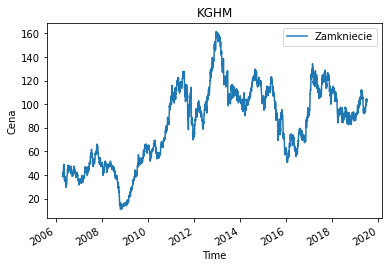

In [47]:
plt.figure(figsize=(12,4))
df.plot()
plt.xlabel('Time')
plt.ylabel('Cena')
plt.title('KGHM')
plt.show()

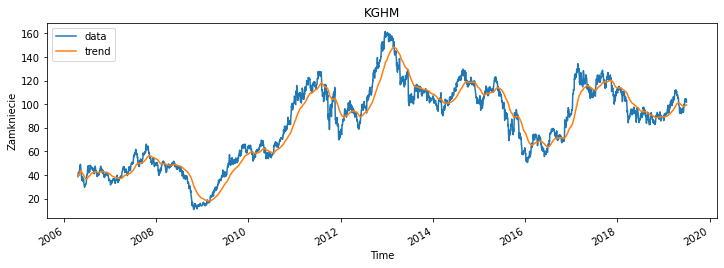

In [48]:
df['trend'] = df.ewm(halflife=30).mean()

plt.figure(figsize=(12,4))
df['Zamkniecie'].plot(label='data')
df['trend'].plot(label='trend')
plt.xlabel('Time')
plt.ylabel('Zamkniecie')
plt.title('KGHM')
plt.legend(loc='upper left')
plt.show()

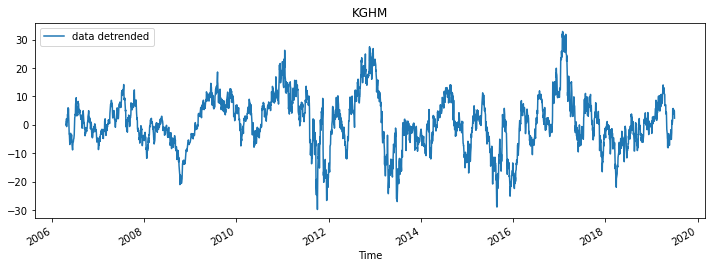

In [49]:
df['detrended'] = df['Zamkniecie'] - df['trend']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
plt.xlabel('Time')
plt.ylabel('')
plt.title('KGHM')
plt.legend(loc='upper left')
plt.show()

<ipython-input-51-ad731e036cc2>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_seasonality = df['detrended'].groupby(df.index.week).mean().rename('seasonality')


Data
1    -0.756871
2     0.580140
3     0.649764
4     0.714058
5     1.207155
6     1.192973
7     2.093711
8     3.318540
9     4.246380
10    2.699143
11    1.772299
12    0.396326
13    0.653931
14    2.121090
15    2.753184
16    1.619230
17    0.845752
18    0.624734
19   -0.377702
20   -1.933777
21   -2.067559
22   -1.722435
23   -0.893538
24   -0.572389
25   -0.611795
26   -0.462473
27    1.000980
28    1.582144
29    3.144689
30    3.541118
31    3.161184
32    2.124305
33    1.246699
34    0.870424
35    1.025630
36    1.128677
37    0.505150
38    0.542977
39   -0.912434
40   -1.332362
41    0.666913
42    1.482747
43    1.427015
44    1.873413
45    2.737598
46    1.747638
47   -0.007205
48   -0.402178
49   -0.314722
50   -1.736734
51   -2.356283
52   -0.407521
53   -2.869204
Name: seasonality, dtype: float64

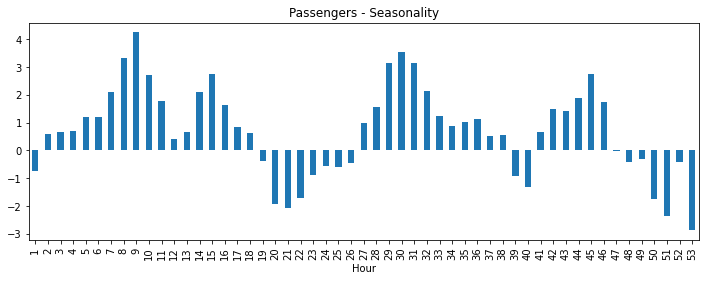

In [51]:
df_seasonality = df['detrended'].groupby(df.index.week).mean().rename('seasonality')
display(df_seasonality)

plt.figure(figsize=(12,4))
df_seasonality.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('')
plt.title('Passengers - Seasonality')
plt.show()

<ipython-input-52-f09fb2b74bbd>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df = df.join(df_seasonality, how='left', on=(df.index.week))


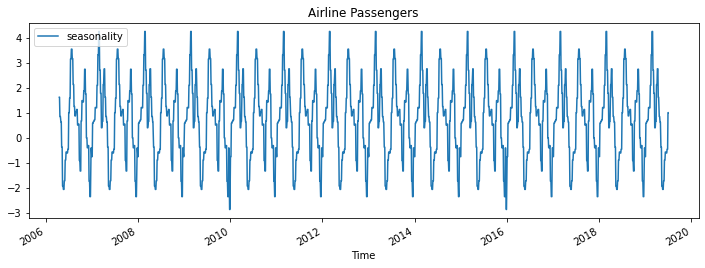

In [52]:
#df_seasonality[:]=0
df = df.join(df_seasonality, how='left', on=(df.index.week))

plt.figure(figsize=(12,4))
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

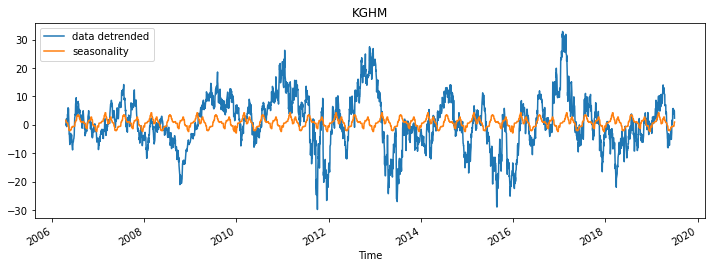

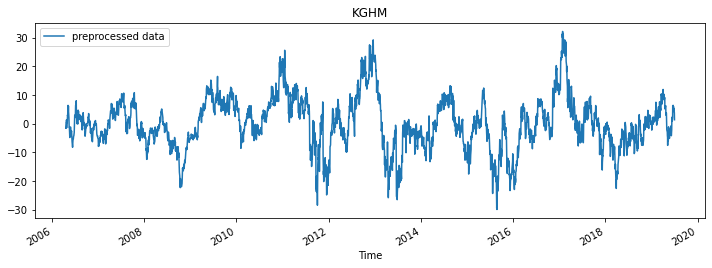

In [53]:
df['preprocessed0'] = df['detrended'] - df['seasonality']

plt.figure(figsize=(12,4))
df['detrended'].plot(label='data detrended')
df['seasonality'].plot(label='seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('KGHM')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
df['preprocessed0'].plot(label='preprocessed data')
plt.xlabel('Time')
plt.ylabel('')
plt.title('KGHM')
plt.legend(loc='upper left')
plt.show()

In [54]:
df["preprocessed1"]=df["preprocessed0"]-df['preprocessed0'].shift(1).fillna(0.0)
df["preprocessed"]=df["preprocessed1"]-df['preprocessed1'].shift(1).fillna(0.0)
df['wariancjaKrocz'] = df['preprocessed0'].rolling(window=24, min_periods=1).var()
df['wariancjaKrocz2'] = df['preprocessed1'].rolling(window=24, min_periods=1).var()
df['wariancjaKrocz3'] = df['preprocessed'].rolling(window=24, min_periods=1).var()

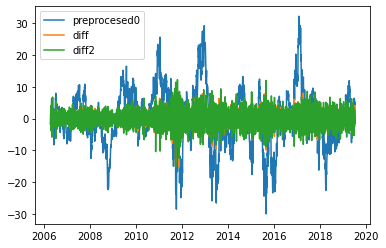

In [55]:
plt.plot(df["preprocessed0"], label="preprocesed0")
plt.plot(df["preprocessed1"], label="diff")
plt.plot(df["preprocessed"], label="diff2")
plt.legend()

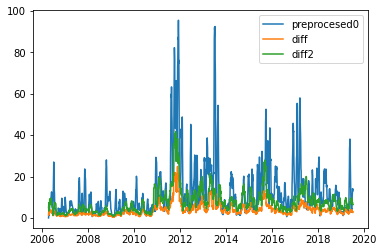

In [56]:
plt.plot(df["wariancjaKrocz"], label="preprocesed0")
plt.plot(df["wariancjaKrocz2"], label="diff")
plt.plot(df["wariancjaKrocz3"], label="diff2")
plt.legend()

In [57]:
df["preprocessed"]=df["preprocessed1"]

## 2. Approach 1: Prediction by the global mean

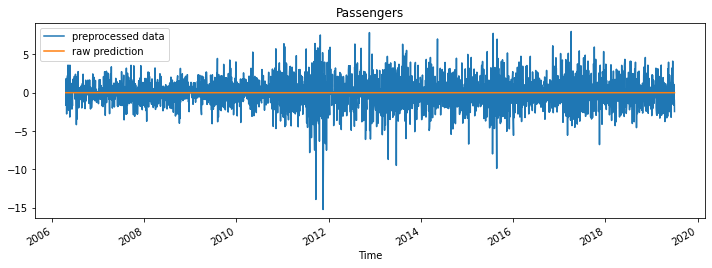

In [58]:
df['prediction_raw'] = df['preprocessed'].mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Passengers')
plt.legend(loc='upper left')
plt.show()

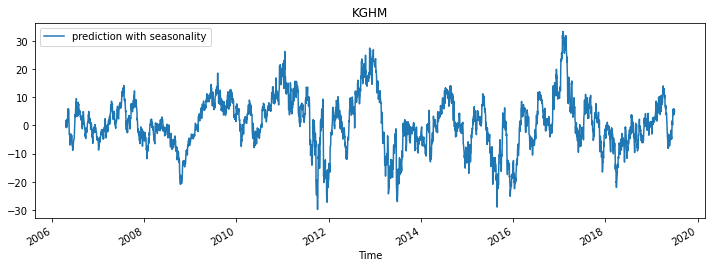

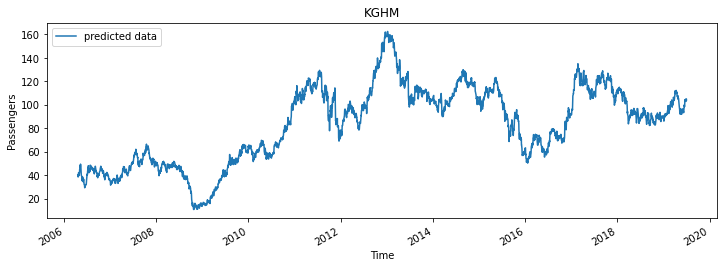

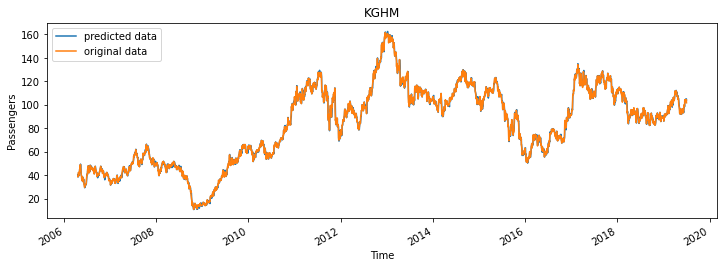

In [60]:
plt.figure(figsize=(12,4))
(df['prediction_raw'] +df['preprocessed0'].shift(1).fillna(0.0)+ df['seasonality']).plot(label='prediction with seasonality')
plt.xlabel('Time')
plt.ylabel('')
plt.title('KGHM')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,4))
((df['prediction_raw'] + df['preprocessed0'].shift(1).fillna(0.0)+df['seasonality']) + df['trend']).plot(label='predicted data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('KGHM')
plt.legend(loc='upper left')
plt.show()

df['prediction'] = (df['prediction_raw'] +df['preprocessed0'].shift(1).fillna(0.0)+ df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Zamkniecie'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('KGHM')
plt.legend(loc='upper left')
plt.show()

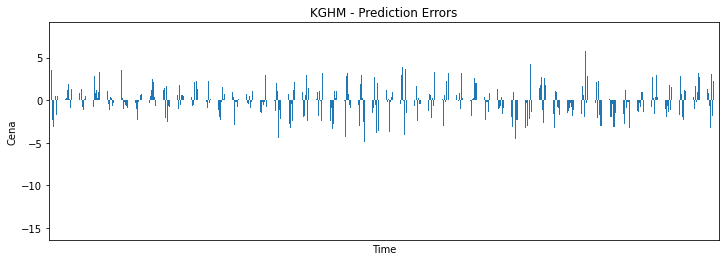

In [61]:
plt.figure(figsize=(12,4))
(df['Zamkniecie'] - df['prediction']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Cena')
plt.title('KGHM - Prediction Errors')
plt.show()

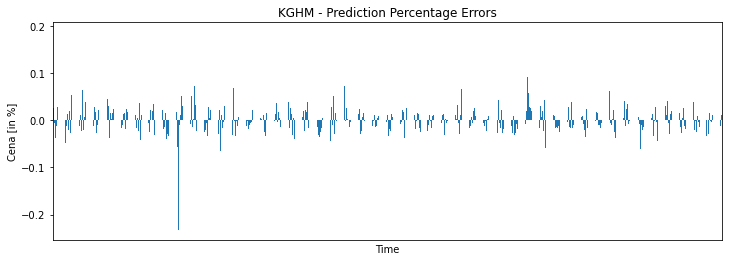

In [62]:
plt.figure(figsize=(12,4))
((df['Zamkniecie'] - df['prediction']) / df['Zamkniecie']).plot(kind='bar')
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Cena [in %]')
plt.title('KGHM - Prediction Percentage Errors')
plt.show()

In [63]:
print('MSE: %0.4f' % ((df['Zamkniecie'] - df['prediction'])**2).mean())

MSE: 3.7665


In [64]:
print('MAE: %0.4f' % (df['Zamkniecie'] - df['prediction']).abs().mean())

MAE: 1.4422


In [65]:
print('MAPE: %0.4f' % ((df['Zamkniecie'] - df['prediction']) / df['Zamkniecie']).abs().mean())

MAPE: 0.0196


## 3. Approach 2: Prediction by the previous value

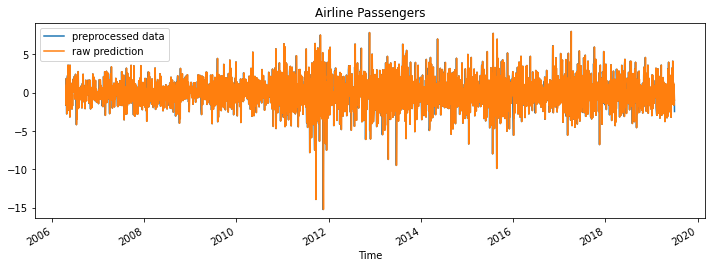

In [66]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0)

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

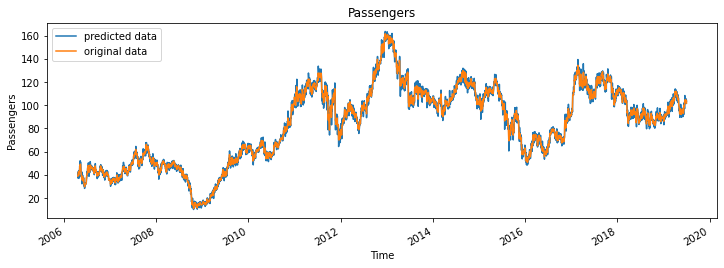

MSE: 7.2433
MAE: 2.0601
MAPE: 0.0278


In [67]:
df['prediction'] = (df['prediction_raw'] + df['preprocessed0'].shift(1).fillna(0.0)+df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Zamkniecie'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Zamkniecie'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Zamkniecie'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Zamkniecie'] - df['prediction']) / df['Zamkniecie']).abs().mean())

## 4. Approach 3: Prediction by the moving average

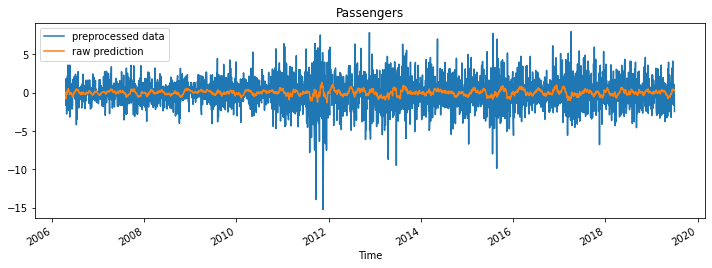

In [82]:
df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=24, min_periods=1).mean()
# df['prediction_raw'] = df['preprocessed'].shift(1).fillna(0.0).rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Passengers')
plt.legend(loc='upper left')
plt.show()

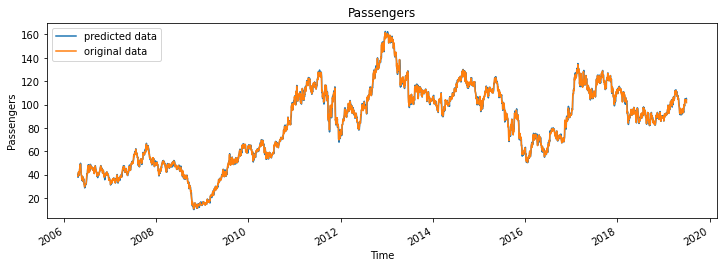

MSE: 3.9459
MAE: 1.4884
MAPE: 0.0202


In [83]:
df['prediction'] = (df['prediction_raw'] + df['preprocessed0'].shift(1).fillna(0.0)+df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Zamkniecie'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Zamkniecie'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Zamkniecie'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Zamkniecie'] - df['prediction']) / df['Zamkniecie']).abs().mean())

## 5. Approach 4: Prediction by the linear regression

In [84]:
reg = linear_model.LinearRegression()

X = df['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y = df['preprocessed'].values[1:]

reg.fit(X, y)

y_predicted = np.zeros(len(df))
y_predicted[1:] = reg.predict(X)

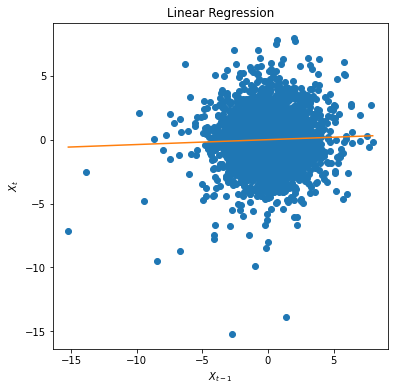

In [85]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], y, 'o')
plt.plot([X.min(), X.max()], [reg.coef_[0] * X.min() + reg.intercept_, reg.coef_[0] * X.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

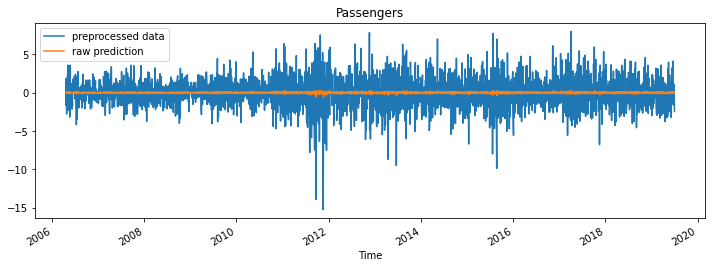

In [86]:
df['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
df['preprocessed'].plot(label='preprocessed data')
df['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Passengers')
plt.legend(loc='upper left')
plt.show()

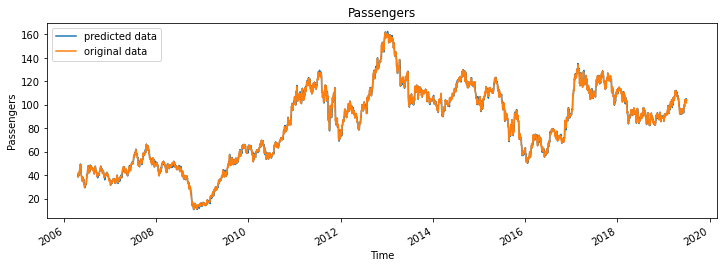

MSE: 3.7610
MAE: 1.4447
MAPE: 0.0196


In [87]:
df['prediction'] = (df['prediction_raw'] + df['preprocessed0'].shift(1).fillna(0.0)+df['seasonality']) + df['trend']

plt.figure(figsize=(12,4))
df['prediction'].plot(label='predicted data')
df['Zamkniecie'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((df['Zamkniecie'] - df['prediction'])**2).mean())
print('MAE: %0.4f' % (df['Zamkniecie'] - df['prediction']).abs().mean())
print('MAPE: %0.4f' % ((df['Zamkniecie'] - df['prediction']) / df['Zamkniecie']).abs().mean())

## 6. Approach 4a: Prediction by the multidimensional linear regression

In [89]:
def make_prediction_with_linear_regression(df, y_predicted):
    df['prediction_raw'] = y_predicted

    plt.figure(figsize=(12,4))
    df['preprocessed'].plot(label='preprocessed data')
    df['prediction_raw'].plot(label='raw prediction')
    plt.xlabel('Time')
    plt.ylabel('')
    plt.title('KGHM')
    plt.legend(loc='upper left')
    plt.show()

    df['prediction'] = (df['prediction_raw'] + df['preprocessed0'].shift(1).fillna(0.0)+df['seasonality']) + df['trend']

    plt.figure(figsize=(12,4))
    df['prediction'].plot(label='predicted data')
    df['Zamkniecie'].plot(label='original data')
    plt.xlabel('Time')
    plt.ylabel('Cena')
    plt.title('KGHM')
    plt.legend(loc='upper left')
    plt.show()

    print('MSE: %0.4f' % ((df['Zamkniecie'] - df['prediction'])**2).mean())
    print('MAE: %0.4f' % (df['Zamkniecie'] - df['prediction']).abs().mean())
    print('MAPE: %0.4f' % ((df['Zamkniecie'] - df['prediction']) / df['Zamkniecie']).abs().mean())

### 6.1. Prediction by the linear regression on the two previous values

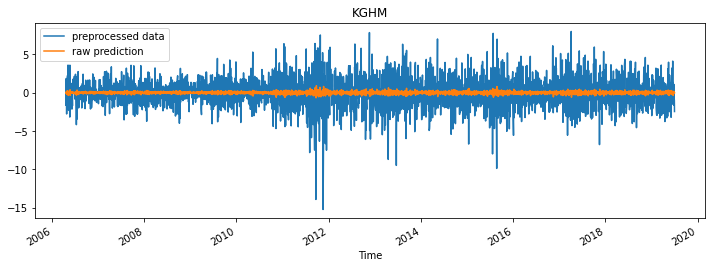

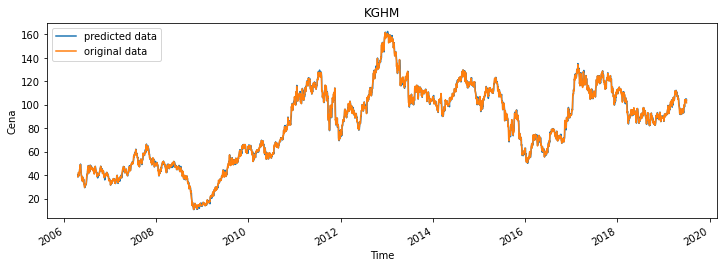

MSE: 3.7411
MAE: 1.4386
MAPE: 0.0195


In [90]:
reg = linear_model.LinearRegression()

X = np.vstack([
    df['preprocessed'].shift(1).values[2:],
    df['preprocessed'].shift(2).values[2:]
]).T
y = df['preprocessed'].values[2:]

reg.fit(X, y)

y_predicted = np.zeros(len(df))
y_predicted[2:] = reg.predict(X)

make_prediction_with_linear_regression(df, y_predicted)

### 6.2. Prediction by the linear regression on the three previous values

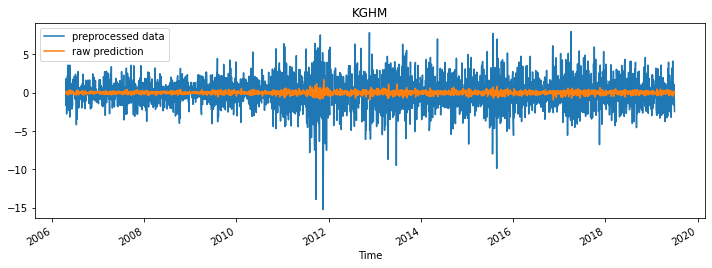

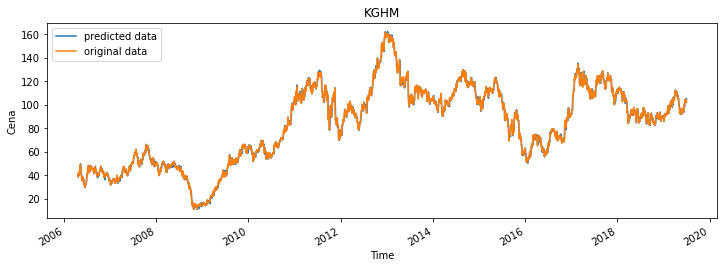

MSE: 3.7196
MAE: 1.4360
MAPE: 0.0195


In [91]:
reg = linear_model.LinearRegression()

X = np.vstack([
    df['preprocessed'].shift(1).values[3:],
    df['preprocessed'].shift(2).values[3:],
    df['preprocessed'].shift(3).values[3:]
]).T
y = df['preprocessed'].values[3:]

reg.fit(X, y)

y_predicted = np.zeros(len(df))
y_predicted[3:] = reg.predict(X)

make_prediction_with_linear_regression(df, y_predicted)

### 6.3. Autocorrelation

In [92]:
np.corrcoef(df['preprocessed'][1:], df['preprocessed'].shift(1)[1:])

array([[1.        , 0.03822307],
       [0.03822307, 1.        ]])

In [93]:
np.corrcoef(df['preprocessed'][2:], df['preprocessed'].shift(2)[2:])

array([[ 1.        , -0.07104516],
       [-0.07104516,  1.        ]])

In [94]:
np.corrcoef(df['preprocessed'][3:], df['preprocessed'].shift(3)[3:])

array([[ 1.        , -0.08125139],
       [-0.08125139,  1.        ]])

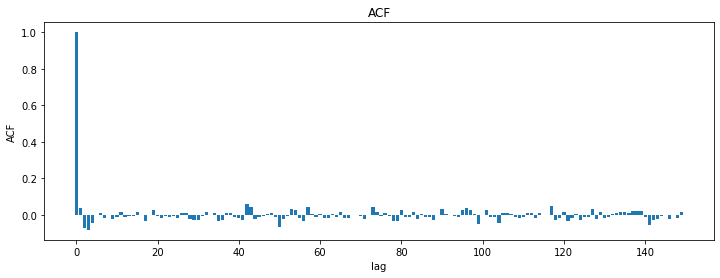

In [96]:
acf = np.zeros(150)
for lag in range(len(acf)):
    acf[lag] = np.corrcoef(df['preprocessed'][lag:], df['preprocessed'].shift(lag)[lag:])[0, 1]

plt.figure(figsize=(12,4))
plt.bar(range(len(acf)), acf)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF')
plt.show()

### 6.4. Prediction by the linear regression on the 15 previous values

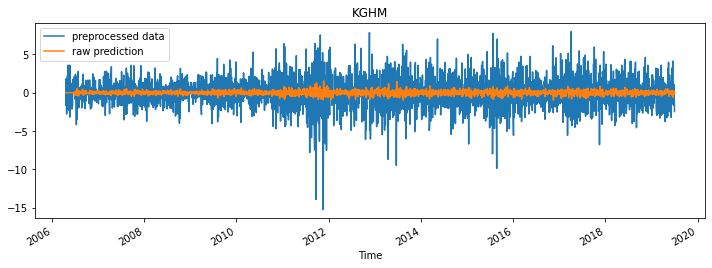

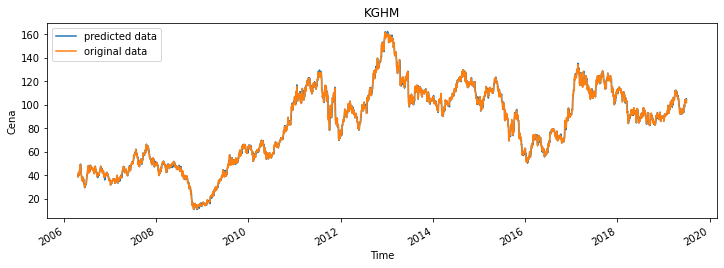

MSE: 3.6964
MAE: 1.4330
MAPE: 0.0195


In [98]:
reg = linear_model.LinearRegression()

X = np.vstack([df['preprocessed'].shift(lag).values[45:] for lag in [1,2,3,4,41,42]]).T
y = df['preprocessed'].values[45:]

reg.fit(X, y)

y_predicted = np.zeros(len(df))
y_predicted[45:] = reg.predict(X)

make_prediction_with_linear_regression(df, y_predicted)

## 7. Remarks

- split the dataset into the train and the test part and repeat the experiments with learning the model on the train dataset and testing on the test dataset for a more reliable validation
- repeat the experiments without removing the trend and/or the seasonality
- repeat the experiments with the subtracting the trend from the original data instead of dividing them by the trend
- similarly, concerning the seasonality
- try to evaluate the trend with other methods, especially simple moving averages vs. exponential moving averages
- study the variance/standard deviation of the data in time, try to normalize it